In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


# EDA
house pricing prediction

### Reading the data

In [7]:
data = pd.read_csv('data/train.csv')
print("dataset types {} ".format(set(data.dtypes.tolist())))
data.head(10)

dataset types {dtype('int64'), dtype('float64'), dtype('O')} 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
data.drop('Id', axis=1, inplace=True) # removing Id feature (will not give any info on the price just fifo).
print(len(data.columns))
data.columns # checking the features.

80


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
data.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


# Handle NaNs Values:

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
MSSubClass      0.000000
dtype: float64


<AxesSubplot:>

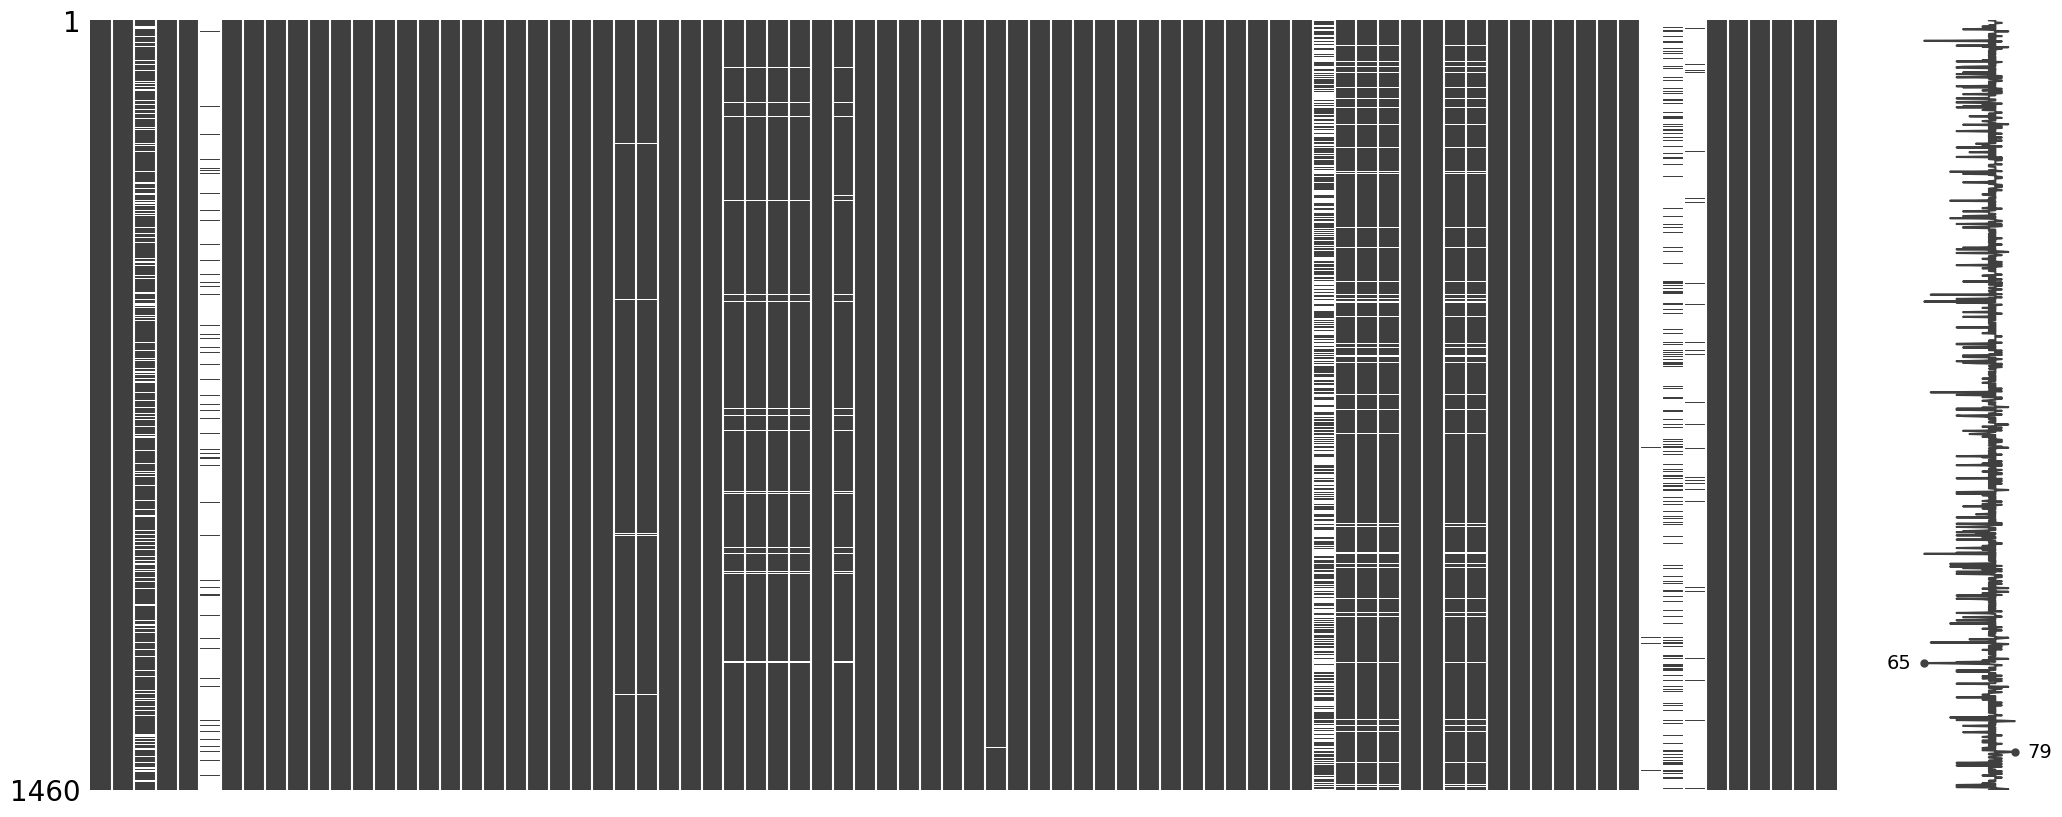

In [10]:
print(data.isna().mean().sort_values(ascending=False)[0:20])
msno.matrix(data)

<AxesSubplot:>

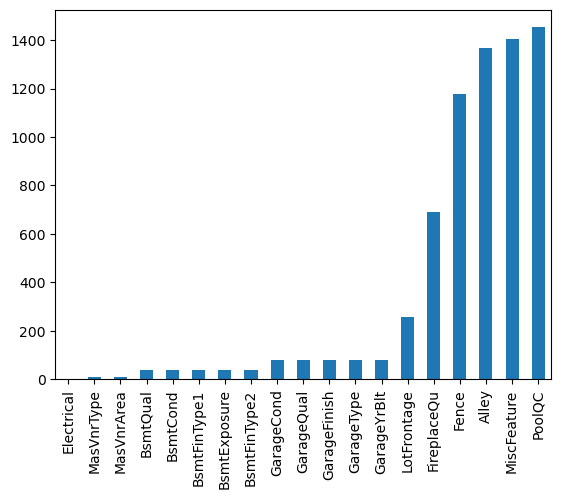

In [11]:
missing_fig = data.isnull().sum()
missing_fig = missing_fig[missing_fig > 0]
missing_fig.sort_values(inplace=True)
missing_fig.plot.bar()

As we can see Fence, Alley, MiscFeature, PoolQC are hold more than 80% NaNs values so we decide to fill them with 'Na' so they will not be nones values: 

In [12]:
def fill_NaNs(df):
    df['PoolQC'] = df['PoolQC'].fillna('NA') # No pool
    df['MiscFeature'] = df['MiscFeature'].fillna('NA') # no special element in the house.
    data['Alley'] = df['Alley'].fillna('NA') # not access to alley
    df['Fence'] = df['Fence'].fillna('NA') # no fence 
    # same thing we will do to FireplaceQu, LotFrontage
    df['FireplaceQu'] = df['FireplaceQu'].fillna('NA') # no fireplace in the house. 
    df['LotFrontage'] = df['LotFrontage'].fillna(0.) # there is no front area.
    # and for the Garage missing houses and the Basement missing houses. 
    df.fillna({'GarageType':'NA', 'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA', 'GarageYrBlt':.0}, inplace=True)
    df.fillna({'BsmtExposure':'NA', 'BsmtQual':'NA', 'BsmtFinType2':'NA', 'BsmtCond':'NA', 'BsmtFinType1': 'NA'}, inplace=True)
    df['MasVnrType'] = df['MasVnrType'].fillna('NA') # No Masonry veneer type
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0.) # No Masonry area. 
    df['Electrical'] = df['Electrical'].fillna(data['Electrical'].mode()[0]) # we will replace the NaNs with the median=SBrkr
    return df
data = fill_NaNs(data)

In [13]:
print(data.isna().mean().sort_values(ascending=False).head(4) ) # get the means for other missing features.
print("as we can see there is one more feature to address!")
print(f"There are { data.isnull().sum().sum()} NaNs values in the Dataset")

MSSubClass     0.0
MSZoning       0.0
GarageYrBlt    0.0
GarageType     0.0
dtype: float64
as we can see there is one more feature to address!
There are 0 NaNs values in the Dataset


# Numerical Features:

In [19]:
numerics = ['int16', 'int32', 'int64']
print(f"There are {len(set(data._get_numeric_data().columns))} Numerical features:\n")
print(set(data._get_numeric_data().columns))
data_numerical = data._get_numeric_data().copy()
data_numerical

There are 37 Numerical features:

{'GarageYrBlt', '3SsnPorch', 'GrLivArea', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'MiscVal', 'ScreenPorch', 'WoodDeckSF', 'PoolArea', 'SalePrice', 'LotArea', 'MSSubClass', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath', 'YrSold', 'LotFrontage', 'YearRemodAdd', 'MoSold', 'MasVnrArea', 'BsmtFullBath', 'BsmtFinSF1', '2ndFlrSF', 'GarageCars', 'OpenPorchSF', 'Fireplaces', 'TotalBsmtSF', 'KitchenAbvGr', 'OverallCond', 'BsmtFinSF2', 'EnclosedPorch', 'BedroomAbvGr', 'HalfBath', 'YearBuilt', 'LowQualFinSF', 'OverallQual'}


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
import seaborn as sns
temo = data_numerical[['MSSubClass', "SalePrice"]]
temo

,MSSubClass,SalePrice
0,60,208500
1,20,181500
2,60,223500
3,70,140000
4,60,250000
...,...,...
1455,60,175000
1456,20,210000
1457,70,266500
1458,20,142125


# Catagorical Features

In [17]:
print("There are {} Categorical features:\n".format(len(data.select_dtypes(exclude='number').columns)))
print(data.select_dtypes(exclude='number').columns)

There are 43 Categorical features:

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


##### Fixing na values in LotFrontage column - disc: Linear feet of street connected to property

there are 1201 rows with null values, are missing 259.
 - the question is if null value is equal to 0 ?? 

<AxesSubplot:>

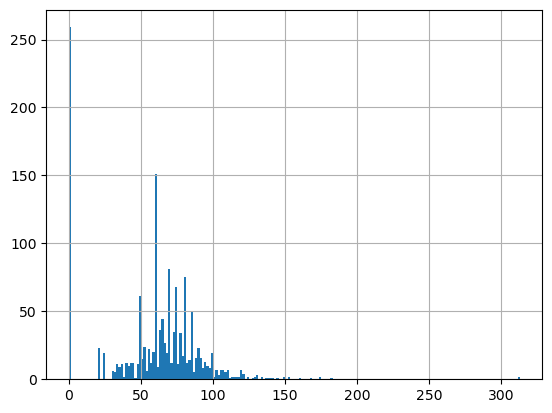

In [36]:
data[data['LotFrontage'].isna()]
data['LotFrontage'].dropna().hist(bins=200)

mean: 57.62328767123287, std: 34.66430423090894 ,median: 63.0


<AxesSubplot:ylabel='Density'>

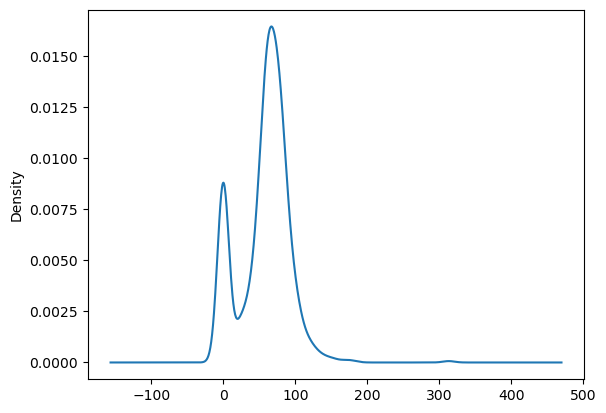

In [37]:
mean = data['LotFrontage'].dropna().mean()
std = data['LotFrontage'].dropna().std()
median = data['LotFrontage'].dropna().median()
print(f"mean: {mean}, std: {std} ,median: {median}")
data['LotFrontage'].dropna().plot.kde()

mean: 57.62328767123287, std: 34.66430423090894 ,median: 63.0


<AxesSubplot:ylabel='Density'>

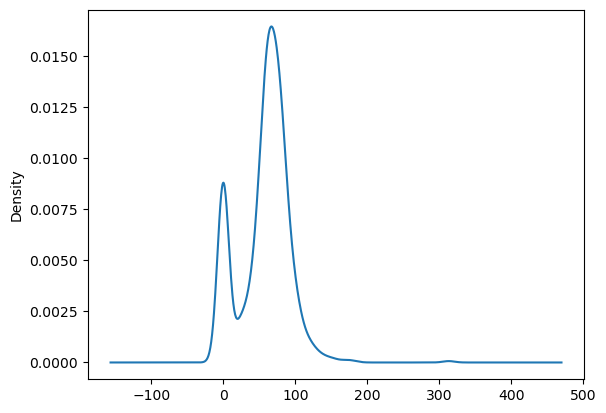

In [38]:
data['LotFrontage'].fillna(median, inplace=True)
mean = data['LotFrontage'].mean()
std = data['LotFrontage'].std()
median = data['LotFrontage'].median()
print(f"mean: {mean}, std: {std} ,median: {median}")
data['LotFrontage'].plot.kde()


##### Fixing na values in GarageType GarageYrBlt GarageFinish GarageQual GarageCond 



In [15]:
len(data.index[data['GarageType'].isna()   &
               data['GarageYrBlt'].isna()  & 
               data['GarageFinish'].isna() &
               data['GarageQual'].isna()   &
               data['GarageCond'].isna()])

81

In [16]:
pd.set_option('display.max_columns', 76)
df_garage_null=data[data['GarageType'].isna()   &
               data['GarageYrBlt'].isna()  & 
               data['GarageFinish'].isna() &
               data['GarageQual'].isna()   &
               data['GarageCond'].isna()]
print("correlation GarageArea & df_garage_null" , len(df_garage_null[df_garage_null['GarageArea'] ==0]))
df_garage_null

correlation GarageArea & df_garage_null 81


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,...,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NA,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,...,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,...,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NA,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,...,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,...,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NA,0,12,2008,WD,Normal,122000
1407,20,RL,69.0,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,...,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,0,3,2009,WD,Normal,112000
1449,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,...,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,0,8,2006,WD,Abnorml,92000
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,...,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NA,0,9,2009,WD,Normal,136000


as we explored those null values are because there is no garage to the property.
we assign them as NA -> not availble. 
* categorical: 
    - GarageType
    - GarageQual	
    - GarageCond
    - GarageFinish
* numerical:
    - GarageYrBlt

In [17]:
data.fillna({'GarageType':'NA', 'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA', 'GarageYrBlt':.0}, inplace=True)
print(data.isna().mean().sort_values(ascending=False).head(20) )

BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
MSSubClass      0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
LowQualFinSF    0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
dtype: float64


##### Fixing na values in BsmtExposure BsmtFinType2 BsmtQual BsmtCond BsmtFinType1 


line 948 can be predicted as a label using all other non-null rows of features: 
['BsmtFinType2']
['BsmtQual']
['BsmtCond']
['BsmtFinType1']

In [18]:
data.loc[[948],'BsmtExposure'] = data['BsmtExposure'].mode()[0]
data.loc[[332],'BsmtFinType2'] =  data['BsmtFinType2'].mode()[0]

In [19]:
data.fillna({'BsmtExposure':'NA', 'BsmtQual':'NA', 'BsmtFinType2':'NA', 'BsmtCond':'NA', 'BsmtFinType1': 'NA'}, inplace=True)

##### Fixing na values in  MasVnrType      MasVnrArea      


In [20]:
data[data['MasVnrType'].isna() & data['MasVnrArea'].isna()][['MasVnrType', 'MasVnrArea', 'OverallQual', '2ndFlrSF', 'GrLivArea', 'SalePrice']]

,MasVnrType,MasVnrArea,OverallQual,2ndFlrSF,GrLivArea,SalePrice
234,NaN,NaN,6,1100,1960,216500
529,NaN,NaN,6,0,2515,200624
650,NaN,NaN,7,843,1665,205950
936,NaN,NaN,7,0,1200,184900
973,NaN,NaN,7,0,1428,182000
977,NaN,NaN,7,0,1241,199900
1243,NaN,NaN,10,0,2076,465000
1278,NaN,NaN,8,903,2031,237000


In [21]:
data['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object